In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/basketball_stat.csv')

In [3]:
df.head()  # 수집된 데이터의 샘플 확인

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [4]:
df.Pos.value_counts()  # 현재 데이터에서 포지션의 개수를 확인

C     50
SG    50
Name: Pos, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# %matplotlib inline을 설정하면 matplotlib.pyplot의 show 함수를 호출하지 않아도
# 주피터 노트북 안에서 그래프가 표시됨

C:\Users\CJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'STL and 2P in 2d plane')

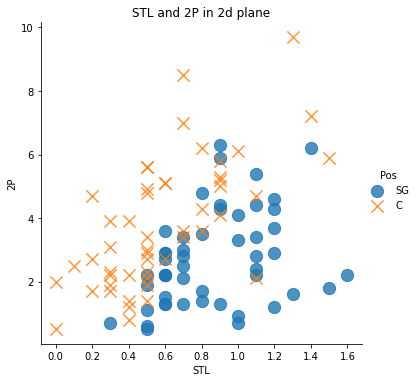

In [6]:
# 스틸, 2점슛 데이터 시각화
sns.lmplot('STL', '2P', data=df, fit_reg=False,  # x축, y축, 데이터, 노라인
           scatter_kws={"s" : 150},  # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# 타이틀
plt.title('STL and 2P in 2d plane')

C:\Users\CJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'AST and 2P in 2d plane')

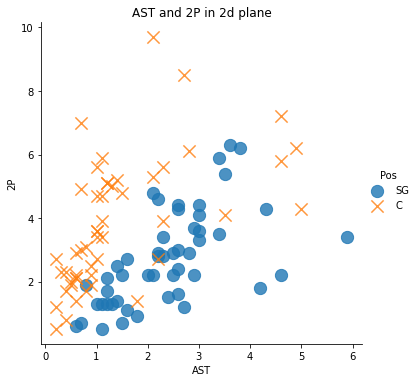

In [7]:
# 어시스트, 2점슛 데이터 시각화
sns.lmplot('AST', '2P', data=df, fit_reg=False,  # x축, y축, 데이터, 노라인
           scatter_kws={"s" : 150},  # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# 타이틀
plt.title('AST and 2P in 2d plane')

C:\Users\CJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'BLK and 3P in 2d plane')

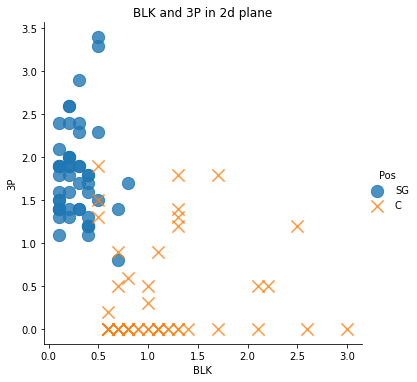

In [8]:
# 블록, 3점슛 데이터 시각화
sns.lmplot('BLK', '3P', data=df, fit_reg=False,  # x축, y축, 데이터, 노라인(선형선 출력하지 않는 옵션)
           scatter_kws={"s" : 150},  # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# 타이틀
plt.title('BLK and 3P in 2d plane')

C:\Users\CJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'TRB and 3P in 2d plane')

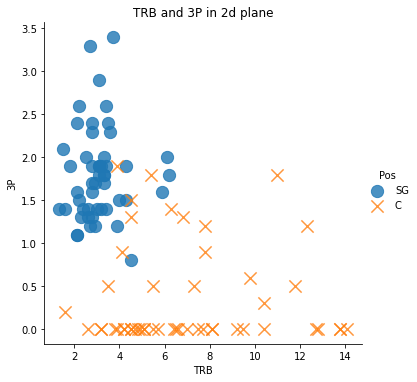

In [9]:
# 리바운드, 3점슛 데이터 시각화
sns.lmplot('TRB', '3P', data=df, fit_reg=False,  # x축, y축, 데이터, 노라인
           scatter_kws={"s" : 150},  # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# 타이틀
plt.title('TRB and 3P in 2d plane')

In [10]:
# 분별력이 없는 특징(feature) 데이터에서 제거
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)

In [11]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [12]:
# 사이킷런의 train_test_split을 사용하면 코드 한 줄로 손쉽게 데이터를 나눌 수 있음
from sklearn.model_selection import train_test_split

In [13]:
# 다듬어진 데이터에서 20%를 테스트 데이터로 분류
train, test = train_test_split(df, test_size=0.2)

In [14]:
train.shape[0]

80

In [15]:
test.shape[0]

20

In [16]:
# kNN 라이브러리 추가
from sklearn.neighbors import KNeighborsClassifier

# 간단하면서 견고한 방법으로 최적의 k 찾기
# kNN 모델의 교차 검증을 수행할 수 있음
from sklearn.model_selection import cross_val_score

In [17]:
# 최적의 k를 착기 위해 교차 검증을 수행할 k의 범위를 3부터 학습 데이터 절반까지 지정
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)
    
cross_validation_scores = []
X_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

# 교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())  # cross_validation(모델의 교차 검증)
    
cross_validation_scores

[0.9,
 0.8625,
 0.875,
 0.8875,
 0.8875,
 0.875,
 0.9,
 0.8875,
 0.8875,
 0.875,
 0.875,
 0.875,
 0.8375,
 0.85,
 0.85,
 0.8375,
 0.8375,
 0.825,
 0.825]

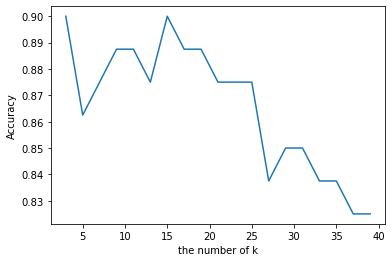

In [18]:
# k에 따른 정확도를 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [23]:
# 가장 예측율이 높은 k를 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("The best number of k : " + str(k))

The best number of k : 3


In [29]:
# 라이브러리 임포트
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

# 학습에 사용될 속성을 지정
X_train = train[['3P', 'BLK', 'TRB']]
# 선수 포지션을 예측할 값으로 지정
y_train = train[['Pos']]

# kNN 모델 학습
# ravel : 다차원을 1차원으로 변환
knn.fit(X_train, y_train.values.ravel())

# 테스트 데이터에서 분류를 위해 사용될 속성을 지정
x_test = test[['3P', 'BLK', 'TRB']]

# 선수 포지션에 대한 정답을 지정
y_test = test[['Pos']]

# 테스트 시작
pred = knn.predict(x_test)

# 모델 예측 정확도(accuracy) 출력
print("accuracy : " + str(accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.95


In [71]:
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,SG,SG
1,SG,SG
2,C,C
3,SG,SG
4,SG,SG
5,C,C
6,SG,SG
7,C,C
8,C,C
9,SG,SG


In [25]:
# 최적의 SVM 파라미터 찾기
# 그리드 서치, 최적의 비용과 감마를 알아낼 수 있음.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC  
import numpy as np

# SVM 최적의 파라미터 찾기
### SVM의 파라미터는 두 가지가 있다. 
1. C: 비용(cost), 결정경계선의 마진을 결정하는 파라미터 
2. gamma: 커널의 데이터포인트의 표준편차를 결정하는 파라미터  
결과적으로 C가 클수록, 결정경계선과 서포트 벡터의 간격(마진)이 작아짐  
결과적으로 gamma가 클수록, 결정경계선이 데이터포인트와 더욱 가까워짐

In [36]:
def svc_param_selection(X, y, nfolds):
    svm_parameters = [
                        {'kernel': ['rbf'],
                         'gamma': [0.00001,0.0001, 0.001, 0.01, 0.1, 1],
                         'C': [0.01, 0.1, 1, 10, 100, 1000]
                        }
                       ]
    
    # 사이킷런에서 제공하는 GridSearchCV를 사용해 최적의 파라미터를 구함
    clf = GridSearchCV(SVC(), svm_parameters, cv=10)
    clf.fit(X_train, y_train.values.ravel())
    print(clf.best_params_)
    
    return clf

In [37]:
# 3점슛과 블로킹 횟수를 학습 데이터로 사용
X_train = train[['3P', 'BLK']]

# 농구선수 포지션을 예측값으로 선정
y_train = train[['Pos']]

# 최적의 파라미터로 학습된 모델을 clf로 저장
clf = svc_param_selection(X_train, y_train.values.ravel(), 10)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


<ipython-input-38-a66dde6d892f>:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
<ipython-input-38-a66dde6d892f>:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
<ipython-input-38-a66dde6d892f>:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X an

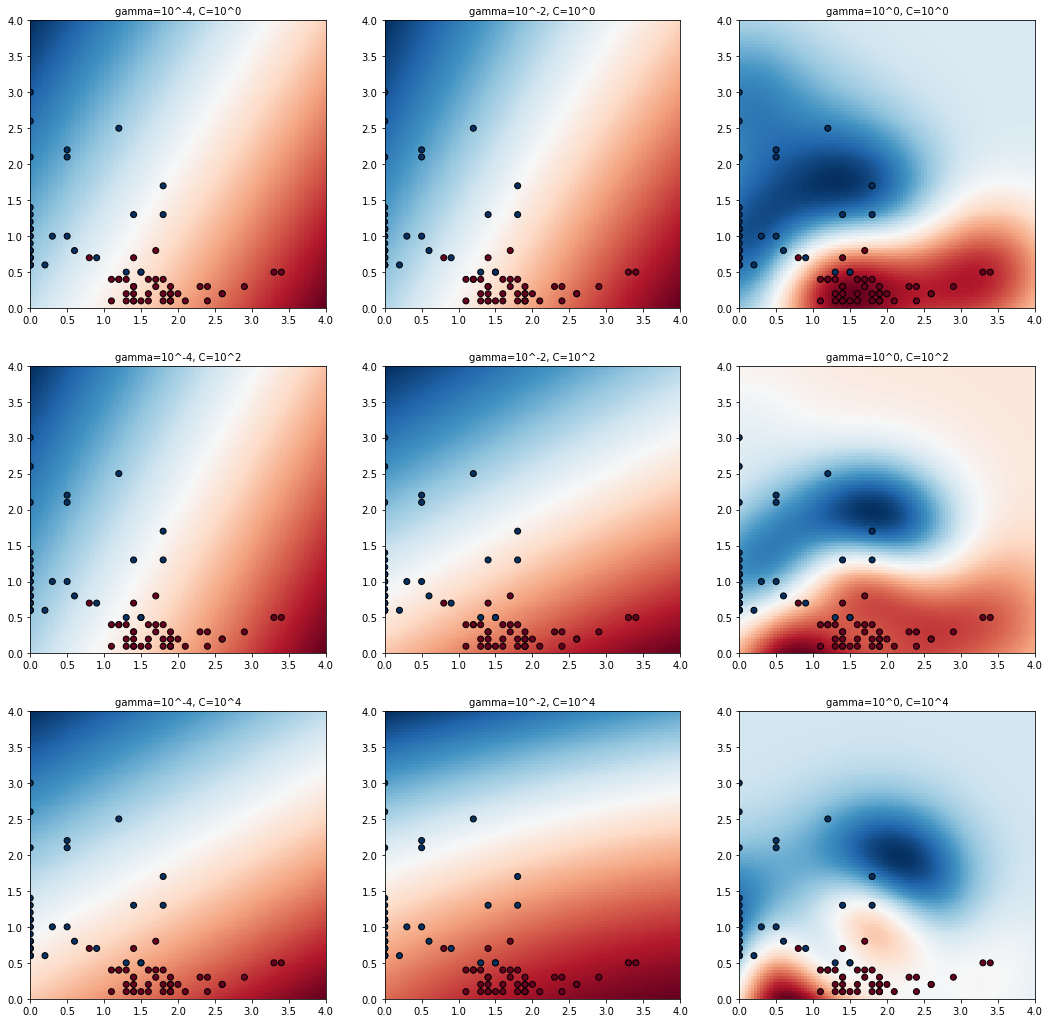

In [38]:
# 시각화를 하기 위해, 최적의 C와 최적의 C를 비교하기 위한 다른 C를 후보로 저장
C_canditates = []
C_canditates.append(clf.best_params_['C'] * 0.01)
C_canditates.append(clf.best_params_['C'])
C_canditates.append(clf.best_params_['C'] * 100)

# 시각화를 하기 위해, 최적의 gamma와 최적의 gamma를 비교하기 위한 다른 gamma를 후보로 저장
gamma_candidates = []
gamma_candidates.append(clf.best_params_['gamma'] * 0.01)
gamma_candidates.append(clf.best_params_['gamma'])
gamma_candidates.append(clf.best_params_['gamma'] * 100)

X = train[['3P', 'BLK']]
Y = train['Pos'].tolist()

# 포지션에 해당하는 문자열 SG와 C를 벡터화
position = []
for gt in Y:
    if gt == 'C':
        position.append(0)
    else:
        position.append(1)

# 각각의 파라미터에 해당하는 SVM 모델을 만들어 classifiers에 저장
classifiers = []
for C in C_canditates:
    for gamma in gamma_candidates:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, Y)
        classifiers.append((C, gamma, clf))

# 18,18 사이즈의 챠트를 구성
plt.figure(figsize=(18, 18))
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))

# 각각의 모델들에 대한 결정 경계 함수를 적용하여 함께 시각화
for (k, (C, gamma, clf)) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 최적의 모델을 포함한 다른 파라미터로 학습된 모델들을 함께 시각화
    plt.subplot(len(C_canditates), len(gamma_candidates), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # 서포트 벡터와 결정경계선을 시각화
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X['3P'], X['BLK'], c=position, cmap=plt.cm.RdBu_r, edgecolors='k')

In [32]:
# 모델 테스트
X_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

# 최적의 파라미터로 학습된 모델로 테스트를 진행
y_true, y_pred = y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred))
print()
print("accuracy : " + str(accuracy_score(y_true, y_pred)))

              precision    recall  f1-score   support

           C       1.00      0.91      0.95        11
          SG       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20


accuracy : 0.95


In [39]:
# 실제값(ground truth)과 예측값(prediction)이 어느 정도 일치하는지 비교
comparison = pd.DataFrame({'prediction':y_pred, 'ground_truth':y_true.values.ravel()}) 
comparison

,prediction,ground_truth
0,C,C
1,C,C
2,SG,SG
3,C,C
4,SG,SG
5,SG,SG
6,SG,SG
7,SG,SG
8,SG,SG
9,C,C
